In [2]:
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.decomposition import FastICA
import pandas as pd
import seaborn as sns
from skimage import io
import scipy
import sklearn
import tensorflow as tf

# Some code from lab sheets

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#data = fashion_mnist.load_data()
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [4]:
#making backup
X_train_orig, X_test_orig = X_train, X_test

In [5]:
#dividing x train and test by 255 to normalise it
#X_train = np.divide(X_train, 255)
#X_test = np.divide(X_test, 255)

# Calculate means
#X_mean = X_train.mean(axis=0)

# Substract means
#X_train_nm = X_train - X_mean
#X_test_nm = X_test - X_mean
#print(X_train.shape)
#X_train_reshaped = X_train_nm.reshape(X_train_nm.shape[0], -1)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
print(X_train_reshaped.shape)

(60000, 784)


In [17]:
X_std = StandardScaler().fit_transform(X_train_reshaped)
X_std_test = StandardScaler().fit_transform(X_test.reshape(X_test.shape[0], -1))
pca = PCA(n_components=2)

# Fit the PCA model to the training data
pca.fit(X_std)

# Transform the training and test data using the fitted PCA model
x_train_pca = pca.transform(X_std)
x_test_pca = pca.transform(X_std_test)

In [18]:
# Fit the PCA model to the training data

# Print the variance explained by each principal component
print(pca.explained_variance_ratio_)

[0.22083547 0.14414633]


In [6]:
def plot_basis_vectors(X, evectors):
    """
    Plots bivariate data as well as new basis vectors.
    """

    plt.figure(figsize=[4, 4])
    plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
    plt.axis('equal')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.plot([0, evectors[0, 0]], [0, evectors[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
    plt.plot([0, evectors[0, 1]], [0, evectors[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
    plt.legend()
    plt.show()

In [7]:
def plot_eigenvalues(evals, limit=True):
    """
    Plots eigenvalues.
    """

    plt.figure(figsize=(10,4))
    plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree plot')
    if limit:
        plt.xlim([0, 100])  # limit x-axis up to 100 for zooming

In [8]:
def sort_evals_descending(evals, evectors):
    """
    Sorts eigenvalues and eigenvectors in decreasing order. This function
    also aligns the first two eigenvectors to be in first two quadrants if
    the data is 2D (remember that any eigenvector's direction can be inverted
    and it is still an eigenvector with the same eigenvalue). 
    """

    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors

22.083547297081754 %


Text(0, 0.5, '$x_2$')

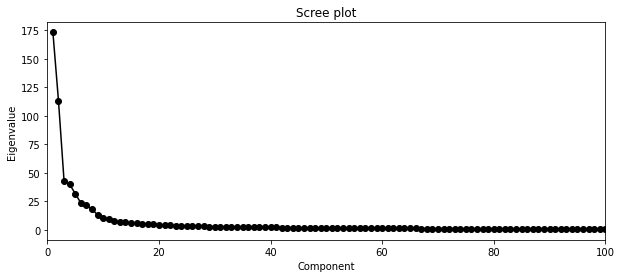

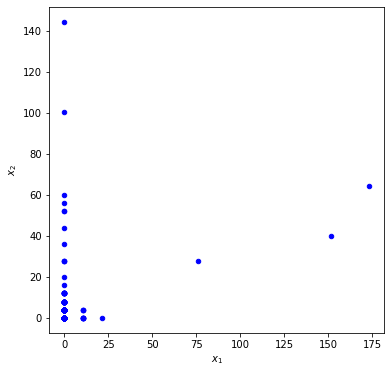

In [9]:
X_std = StandardScaler().fit_transform(X_train_reshaped)
X_cov_matrix = np.cov(X_std.T)
evals, evectors  = np.linalg.eig(X_cov_matrix)

total = sum(evals)
sorted_eval = [ (i/total)*100 for i in sorted(evals, reverse=True)]
eval_sum = np.cumsum(sorted_eval)

# How much variance does each principal component explain?
print(eval_sum[0],'%')

# How much variance does each principal component explain?
plot_eigenvalues(evals)
plt.figure(figsize=(6, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], s=20, c='b') #use standardised x
#plt.scatter(X[:, 0], X[:, 1], s=20, c=category_indices)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


In [10]:
#mean = np.array([0, 0])
#orig_cov_matrix = [[1.0, 0.8], [0.8, 1.0]]
#samples = 1000
#X = np.random.multivariate_normal(mean, orig_cov_matrix, size=samples)
#indices_for_sorting = np.argsort(X[:, 0])
#X = X[indices_for_sorting, :]
#cov_matrix = [[0.96595536, 0.79103839],[0.79103839, 1.00568202]]





[[ 1.         -0.0476134 ]
 [ 0.          0.99886584]]


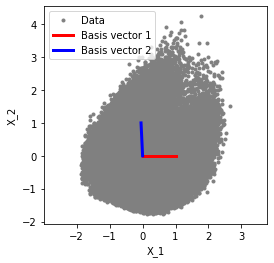

In [10]:
X_std = StandardScaler().fit_transform(X_train_reshaped)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_pca_std = StandardScaler().fit_transform(X_pca)
X_pca_cov_matrix = np.cov(X_pca_std.T)
evals, evectors  = np.linalg.eig(X_pca_cov_matrix)

eig_vec_val  = sort_evals_descending(evals, evectors)
new_eig_vecs = eig_vec_val[1]

print(new_eig_vecs)

# plot the two components that explain the most variance 
plot_basis_vectors(X_pca_std, evectors)

In [13]:
# Initialize PCA object
X_std = StandardScaler().fit_transform(X_train_reshaped)
pca = PCA()

# Fit PCA to normalized data with no components
X_pca = pca.fit_transform(X_std)
print(X_pca.shape)

# Cumulative explained variance
cum_exp_variance = np.cumsum(pca.explained_variance_)

# Print first 5 PCs' cumulative explained variance
# Should we print the the explained variances or the cumulative explained variances?

# Return the pca object for further use
print(f"First 5 PCs: {pca.explained_variance_[:5]}")


(60000, 784)
First 5 PCs: [173.13789644 113.01260323  42.81633652  39.89596074  31.79084015]


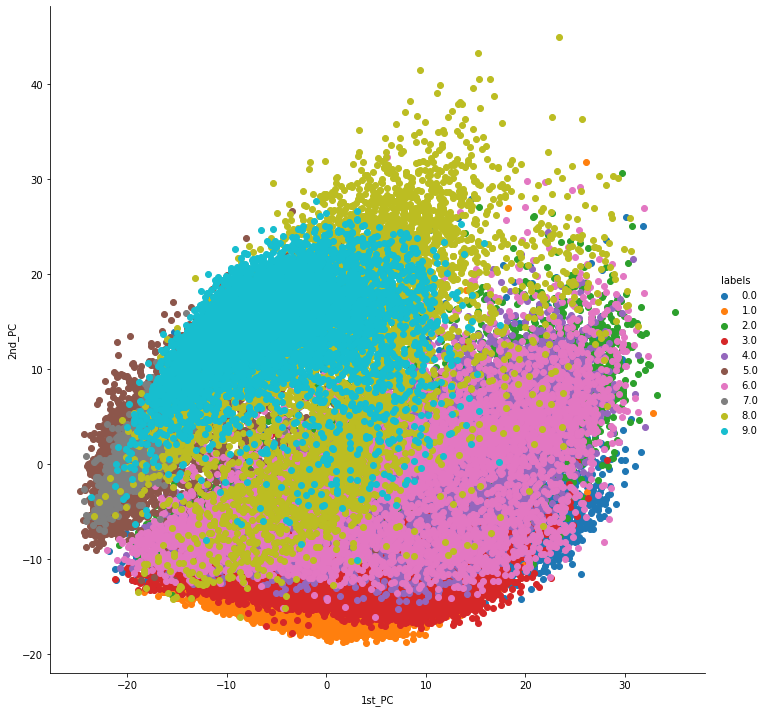

In [14]:
X_std = StandardScaler().fit_transform(X_train_reshaped)

pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X_std)

X_pca_with_labels = np.vstack((X_pca.T, Y_train)).T

df = pd.DataFrame(data=X_pca_with_labels, columns=('1st_PC', '2nd_PC', 'labels'))

# interpret and discuss your results
sns.FacetGrid(df, hue='labels', height=10).map(plt.scatter, '1st_PC', '2nd_PC').add_legend()
plt.show()